Importo las librerias a utilizar

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Creo un DataFrame con la información acerca de las visualizaciones de la página web en función del tiempo que están en el archivo .csv

In [34]:
df = pd.read_csv(r'fcc-forum-pageviews.csv',
                 parse_dates=['date'])
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


Realizo una copia del DataFrame para realizar un gráfico de linea

In [35]:
df_line = df.copy()

Defino las fechas como ínidices

In [36]:
df_line.set_index('date', inplace=True)

Realizo un grafico de líneas

Text(0, 0.5, 'Page Views')

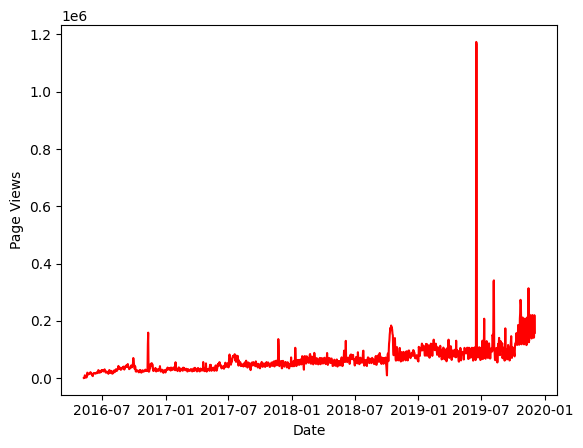

In [37]:
plt.plot(df_line['value'], linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Page Views')

Observamos valores extremos que distorsionan la visualización, por lo que procedo a limpiar las colas de la distribución de valores

In [38]:
lower_bound = df_line['value'].quantile(0.025)
upper_bound = df_line['value'].quantile(0.975)

df_clean = df_line[
    (df_line['value'] >= lower_bound) &
    (df_line['value'] <= upper_bound)
    ]

Grafico con el DataFrame 'curado'

Text(0, 0.5, 'Page Views')

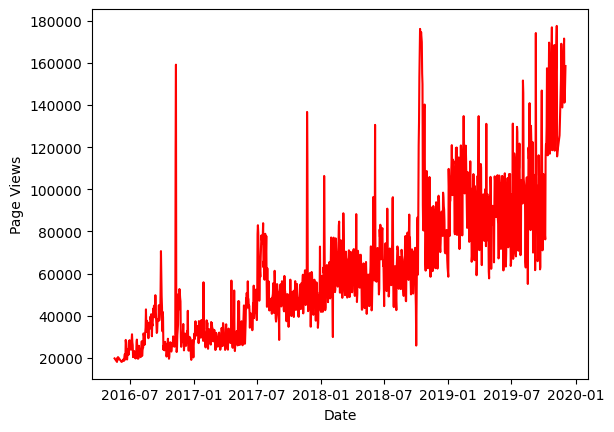

In [39]:
plt.plot(df_clean['value'], linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Page Views')

Podemos ver como las visualizaciones aumentan en función del tiempo.

Filtro los valores extremos y creo una copia del DataFrame para realizar un grafico de barras

In [40]:
df_clean_barbox = df[
    (df['value'] >= lower_bound) &
    (df['value'] <= upper_bound)
    ]

df_bar = df_clean_barbox.copy()

Creo columnas de Año y Mes a partir de las fechas para poder realizar un análisis segmentado

In [41]:
df_bar['year'] = df_bar['date'].dt.year
df_bar['month'] = df_bar['date'].dt.month

Agrupo por Año y Mes y calculo el promedio

In [42]:
df_monthavg = df_bar.groupby(['year', 'month'])['value'].mean().reset_index()
df_monthavg.head()

,year,month,value
0,2016,5,19432.400000
1,2016,6,21875.105263
2,2016,7,24109.678571
3,2016,8,31049.193548
4,2016,9,41476.866667


Formateo los datos para indexar por Año y los Meses como columnas

In [43]:
df_pivot = df_monthavg.pivot(index='year', columns='month', values='value')
df_pivot.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


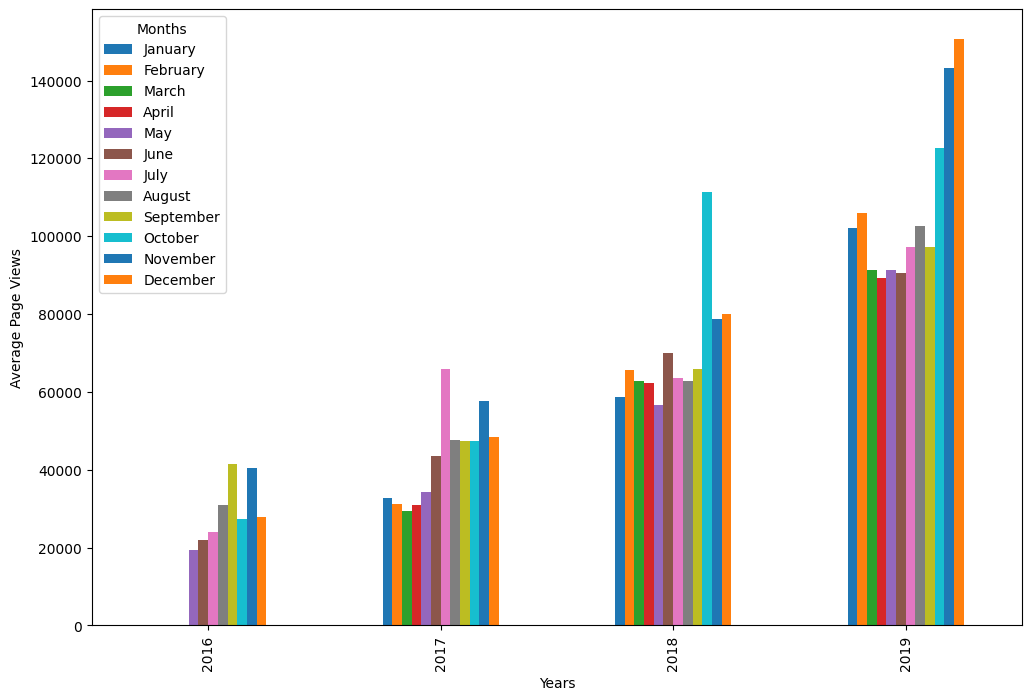

In [44]:
df_pivot.plot(kind='bar', figsize=(12, 8))
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.legend(title='Months', labels=month_names)
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.show()

Realizo el mismo proceso para graficar en formato boxplot

C:\Users\Tino\AppData\Local\Temp\ipykernel_14884\397229971.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x=df_box['year'], y=df_box['value'], palette=colours, ax=axes[0])
C:\Users\Tino\AppData\Local\Temp\ipykernel_14884\397229971.py:8: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(data=df_box, x=df_box['year'], y=df_box['value'], palette=colours, ax=axes[0])
C:\Users\Tino\AppData\Local\Temp\ipykernel_14884\397229971.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x=df_box['month'], y=df_box['value'], ax=axes[1], palette=coloursbox)
C:\Users\Tino\AppData\Local\Temp\ipykernel_14884\397229971.p

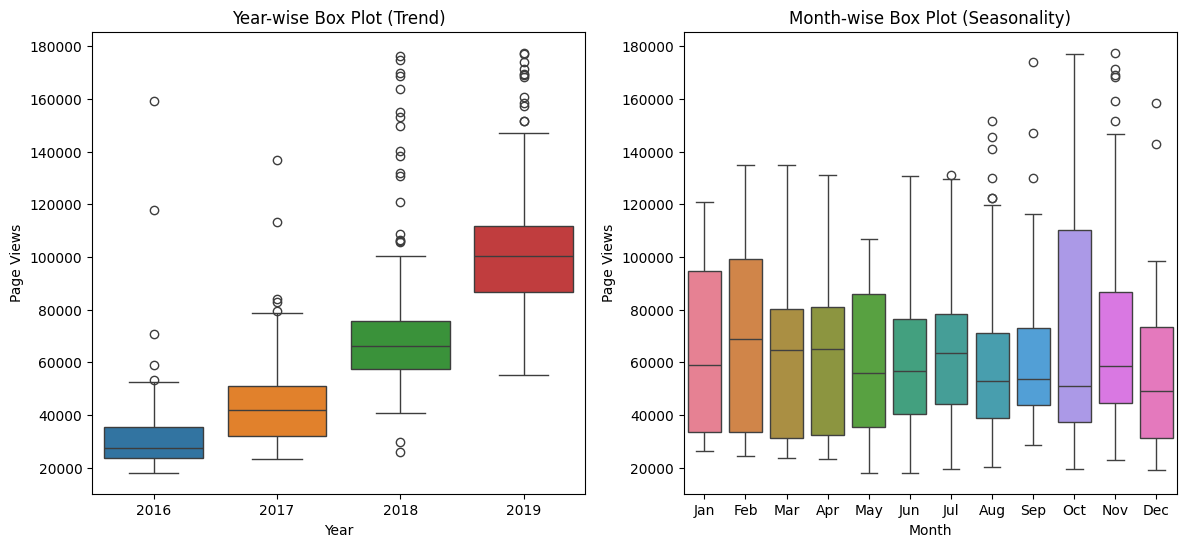

In [45]:
df_box = df_clean_barbox.copy()

df_box['year'] = df_box['date'].dt.year
df_box['month'] = df_box['date'].dt.month

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
colours = sns.color_palette()
sns.boxplot(data=df_box, x=df_box['year'], y=df_box['value'], palette=colours, ax=axes[0])
axes[0].set_ylabel('Page Views')
axes[0].set_xlabel('Year')
axes[0].set_title('Year-wise Box Plot (Trend)')

coloursbox = sns.color_palette("husl", 12)
sns.boxplot(data=df_box, x=df_box['month'], y=df_box['value'], ax=axes[1], palette=coloursbox)

month_names_short = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

axes[1].set_ylabel('Page Views')
axes[1].set_xlabel('Month')
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xticklabels(month_names_short)

plt.show()